In [161]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [162]:
data = pd.read_csv('/Users/muhammadpandu/Documents/semester 2 Pandu/Ipsd/Tugas regresi /DataCO2.csv')
data

,Nama,Model,Volume,Bobot,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105
5,VW,Up!,1000,929,105
6,Skoda,Fabia,1400,1109,90
7,Mercedes,A-Class,1500,1365,92
8,Ford,Fiesta,1500,1112,98
9,Audi,A1,1600,1150,99


In [163]:
print("\nStatistik Deskriptif:")
print(data.describe())


Statistik Deskriptif:
            Volume        Bobot         CO2
count    36.000000    36.000000   36.000000
mean   1611.111111  1292.277778  102.027778
std     388.975047   242.123889    7.454571
min     900.000000   790.000000   90.000000
25%    1475.000000  1117.250000   97.750000
50%    1600.000000  1329.000000   99.000000
75%    2000.000000  1418.250000  105.000000
max    2500.000000  1746.000000  120.000000


In [164]:
missing_values = data.isnull().sum()
missing_values

Nama      0
Model     0
Volume    0
Bobot     0
CO2       0
dtype: int64

In [165]:
# Memeriksa Tipe Data
print(data.dtypes)

# Menampilkan informasi tentang dataset
print(data.info())


Nama      object
Model     object
Volume     int64
Bobot      int64
CO2        int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Nama    36 non-null     object
 1   Model   36 non-null     object
 2   Volume  36 non-null     int64 
 3   Bobot   36 non-null     int64 
 4   CO2     36 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.5+ KB
None


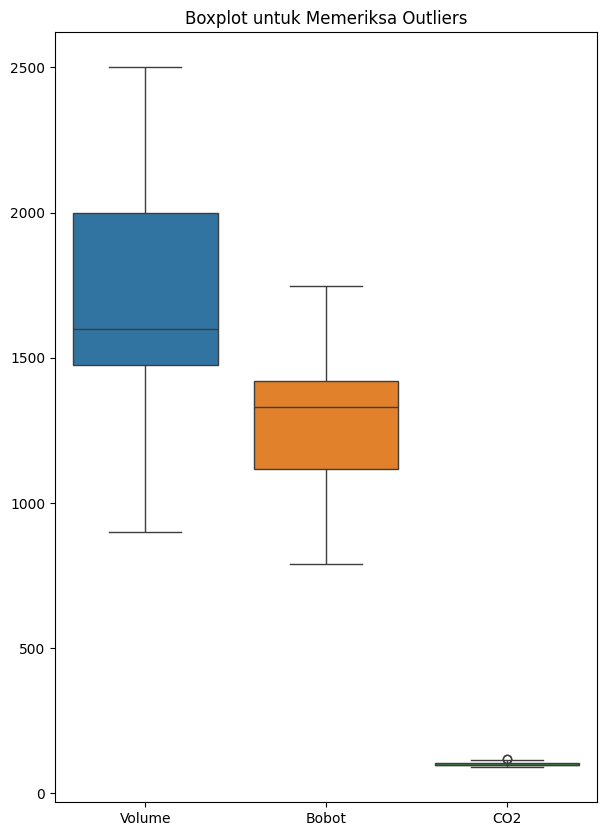

In [166]:
# 4. Memeriksa Outliers menggunakan Boxplot
plt.figure(figsize=(7, 10))
sns.boxplot(data=data[['Volume', 'Bobot', 'CO2']])
plt.title('Boxplot untuk Memeriksa Outliers')
plt.show()


In [167]:
from scipy.stats.mstats import winsorize
data['CO2_winsorized'] = winsorize(data[ 'CO2'], limits=[0.05, 0.05])
data

,Nama,Model,Volume,Bobot,CO2,CO2_winsorized
0,Toyoty,Aygo,1000,790,99,99
1,Mitsubishi,Space Star,1200,1160,95,95
2,Skoda,Citigo,1000,929,95,95
3,Fiat,500,900,865,90,90
4,Mini,Cooper,1500,1140,105,105
5,VW,Up!,1000,929,105,105
6,Skoda,Fabia,1400,1109,90,90
7,Mercedes,A-Class,1500,1365,92,92
8,Ford,Fiesta,1500,1112,98,98
9,Audi,A1,1600,1150,99,99


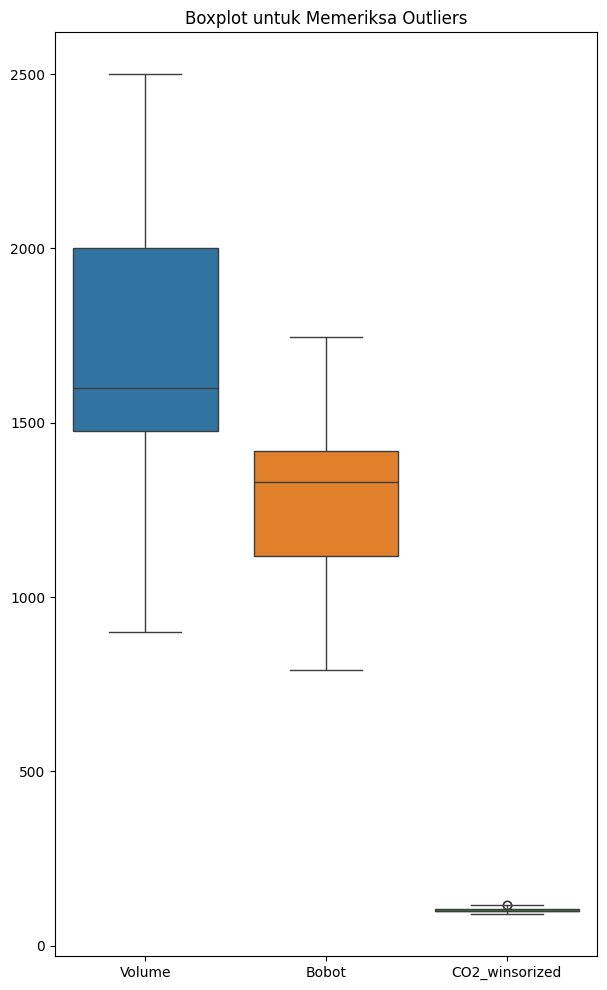

In [168]:
# 4. Memeriksa Outliers menggunakan Boxplot
plt.figure(figsize=(7, 12))
sns.boxplot(data=data[['Volume', 'Bobot', 'CO2_winsorized']])
plt.title('Boxplot untuk Memeriksa Outliers')
plt.show()

In [169]:
data.dtypes

Nama              object
Model             object
Volume             int64
Bobot              int64
CO2                int64
CO2_winsorized     int64
dtype: object

### Tipe data non-numerik: 
Tidak ada (hanya tipe numerik dan boolean).
### Tipe data nominal:
Kolom-kolom Nama_X yang menunjukkan model mobil yang berbeda (misalnya, Nama_BMW, Nama_Ford, dll.) dianggap sebagai data nominal.
### Tipe data ordinal: 
Tidak ada kolom yang bersifat ordinal dalam dataset ini.

Informasi Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Nama    36 non-null     object
 1   Model   36 non-null     object
 2   Volume  36 non-null     int64 
 3   Bobot   36 non-null     int64 
 4   CO2     36 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.5+ KB
None

Statistik Deskriptif:
            Volume        Bobot         CO2
count    36.000000    36.000000   36.000000
mean   1611.111111  1292.277778  102.027778
std     388.975047   242.123889    7.454571
min     900.000000   790.000000   90.000000
25%    1475.000000  1117.250000   97.750000
50%    1600.000000  1329.000000   99.000000
75%    2000.000000  1418.250000  105.000000
max    2500.000000  1746.000000  120.000000

Missing Values:
Series([], dtype: int64)


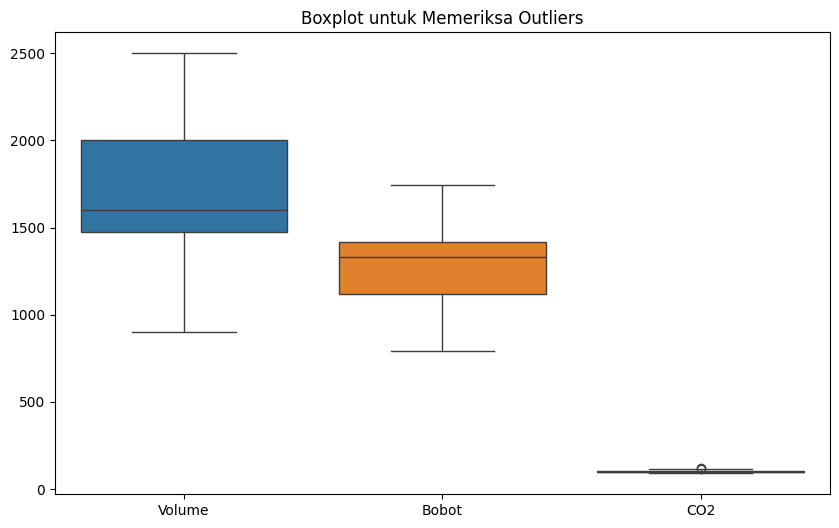


Data setelah Preprocessing:
         Nama       Model    Volume     Bobot  CO2
0      Toyoty        Aygo -1.593366 -2.103893   99
1  Mitsubishi  Space Star -1.071901 -0.554072   95
2       Skoda      Citigo -1.593366 -1.521663   95
3        Fiat         500 -1.854099 -1.789740   90
4        Mini      Cooper -0.289703 -0.637846  105


In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Membaca Data
data = pd.read_csv('DataCO2.csv')

# 2. Menampilkan Informasi Awal
print("Informasi Data:")
print(data.info())
print("\nStatistik Deskriptif:")
print(data.describe())

# 3. Memeriksa Missing Values
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])  # Hanya menampilkan kolom yang memiliki missing values

# 4. Memeriksa Outliers menggunakan Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['Volume', 'Bobot', 'CO2']])
plt.title('Boxplot untuk Memeriksa Outliers')
plt.show()

# 5. Encoding untuk Variabel Kategori (jika ada)
# Misalkan kita punya kolom kategori, lakukan encoding
# data = pd.get_dummies(data, columns=['nama_kolom_kategori'], drop_first=True)

# 6. Normalisasi/Standardisasi
from sklearn.preprocessing import StandardScaler

# Memilih fitur untuk dinormalisasi
features = ['Volume', 'Bobot']
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])

# Menampilkan data setelah preprocessing
print("\nData setelah Preprocessing:")
print(data.head())


In [171]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
X = data[['Volume', 'Bobot']]  # Fitur
y = data['CO2']                # Target

# Split data untuk pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membangun model regresi
model = LinearRegression()
model.fit(X_train, y_train)

# Memprediksi nilai CO2
y_pred = model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Menampilkan koefisien regresi
print("Koefisien:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error: 58.07928583657771
R^2 Score: 0.32941109624012743
Koefisien: [1.64437158 1.92166387]
Intercept: 101.52442593726562


In [172]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Memisahkan fitur dan target
X = data[['Volume', 'Bobot']]  # Fitur independen
y = data['CO2']                # Target dependen

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat dan melatih model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

# Memprediksi pada data pengujian
y_pred = model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
print("Koefisien:", model.coef_)
print("Intercept:", model.intercept_)


Mean Squared Error: 58.07928583657771
R^2 Score: 0.32941109624012743
Koefisien: [1.64437158 1.92166387]
Intercept: 101.52442593726562


In [173]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Memisahkan fitur dan target
X = data[['Volume', 'Bobot']]
y = data['CO2']

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menerapkan transformasi polinomial derajat 2
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Membuat dan melatih model regresi polinomial
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

# Memprediksi pada data pengujian
y_pred_poly = model_poly.predict(X_test_poly)

# Evaluasi model
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Mean Squared Error (Polinomial):", mse_poly)
print("R^2 Score (Polinomial):", r2_poly)


Mean Squared Error (Polinomial): 74.3565227301858
R^2 Score (Polinomial): 0.14147258619305592


Parameter a: 166.25084038356852
Parameter b: -4.278832180172671
Parameter c: 75.86857493357101
Parameter d: 4.058472026570783
Parameter e: -64.22306327896843
Mean Absolute Error (MAE): 5.1215575600996806
Mean Squared Error (MSE): 37.555811159566105
Root Mean Squared Error (RMSE): 6.1282796247859075
R-squared (R²) Score: 0.3048696601951232


/var/folders/c9/hc0ty_1x5m32c7wkk1tjlp4r0000gn/T/ipykernel_12156/3334894573.py:18: OptimizeWarning: Covariance of the parameters could not be estimated
  params, covariance = curve_fit(sigmoidal, X, y)


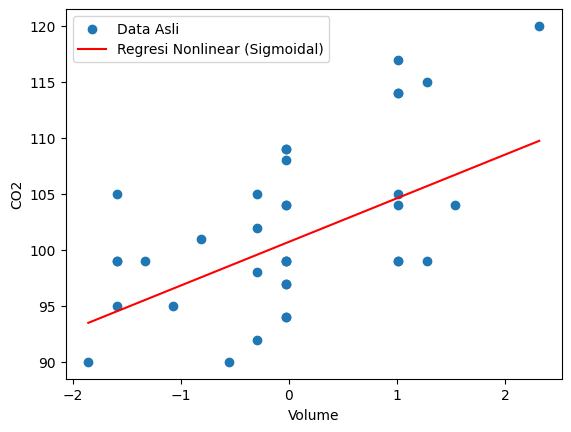

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Memisahkan fitur independen (Volume dan Bobot) dan target dependen (CO2)
X = data[['Volume', 'Bobot']].values.T  # Transpose supaya cocok dengan fungsi curve_fit
y = data['CO2'].values

# Fungsi sigmoid untuk dua variabel
def sigmoidal(X, a, b, c, d, e):
    volume, bobot = X
    return a / (1 + np.exp(-b * (volume - c))) + d * bobot + e

# Melakukan regresi nonlinear
params, covariance = curve_fit(sigmoidal, X, y)

# Membuat model regresi nonlinear
a, b, c, d, e = params
volume_range = np.linspace(min(data['Volume']), max(data['Volume']), 100)
bobot_range = np.linspace(min(data['Bobot']), max(data['Bobot']), 100)
X_fit = np.array([volume_range, bobot_range])
Y_fit = sigmoidal(X_fit, a, b, c, d, e)

# Memprediksi nilai Y berdasarkan X asli
Y_pred = sigmoidal(X, a, b, c, d, e)

# Menghitung metrik evaluasi
mae = mean_absolute_error(y, Y_pred)
mse = mean_squared_error(y, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, Y_pred)

# Menampilkan hasil regresi nonlinear
print("Parameter a:", a)
print("Parameter b:", b)
print("Parameter c:", c)
print("Parameter d:", d)
print("Parameter e:", e)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²) Score:", r2)

# Visualisasi hasil regresi nonlinear terhadap Volume
plt.scatter(data['Volume'], y, label='Data Asli')
plt.plot(volume_range, Y_fit, color='red', label='Regresi Nonlinear (Sigmoidal)')
plt.xlabel('Volume')
plt.ylabel('CO2')
plt.legend()
plt.show()


SETELAH SAYA COBA MENGGUNAKAN BEBERAPA REGRESI YANG ADA PADA PPT HASIL MENUNJUKKAN KURANG OPTIMAL NAMUN :
* Jika berfokus pada MSE yang lebih rendah, maka model pertama (sigmoidal) sedikit lebih baik karena memberikan MSE yang lebih rendah.
* Namun, jika mengutamakan kemampuan penjelasan model (R²), maka model kedua (regresi linear) sedikit lebih baik meskipun perbedaannya tidak terlalu signifikan.